In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [39]:
directory =  "forward/Karim/" # "backward/subj0/"

feedback_blocks_dict = {
    "forward/Karim/": {
        'No Motor Noise': [1, 2, 3], 
        'Small Motor Noise': [4, 5, 6],
        'Medium Motor Noise': [7, 8, 9],
        'Large Motor Noise': [10, 11, 12],
        'No Motor Noise 2': [13, 14, 15]}  # After-Effect?
}

In [40]:
geometry_specs = np.loadtxt(directory + "geometry_specs.csv", delimiter=',')
print(geometry_specs)

SCREEN_WIDTH, SCREEN_HEIGHT = geometry_specs[0], geometry_specs[1]
TABLE_WIDTH = SCREEN_WIDTH - 100
TABLE_HEIGHT = int(SCREEN_HEIGHT * 0.9)
ZONE_WIDTH = int(TABLE_WIDTH * 0.95)
ZONE_HEIGHT = 150
TABLE_RECT = [(SCREEN_WIDTH - TABLE_WIDTH) // 2, (SCREEN_HEIGHT - TABLE_HEIGHT) // 2, TABLE_WIDTH, TABLE_HEIGHT]
SCORING_RECT = [(SCREEN_WIDTH - ZONE_WIDTH) // 2, int(TABLE_HEIGHT * 0.2), ZONE_WIDTH, ZONE_HEIGHT]

[1470.  956.]


In [41]:
trial_positions = np.loadtxt(directory + 'trial_positions.csv', delimiter=',')
print(trial_positions[:4])

# TODO: extract and do for each feedback type
def get_xy_coords(trial_positions, first_block = 1, end_block = 3):
    blocks = []
    for block in range(first_block, end_block + 1):
        block_positions = trial_positions[trial_positions[:, -1] == block]
        x, y = block_positions[:, 0], block_positions[:, 1]
        blocks.append((x, y))
    return blocks

[[299.97925504 421.97925504   1.        ]
 [233.94863023 288.89516035   1.        ]
 [401.34038975 550.86319121   1.        ]
 [318.68152682 451.18254183   1.        ]]


In [42]:
def plot_feedback_type(axis, xy_coords, feedback_type = "None", save_fig = False):
    x1, y1 = xy_coords[0]
    x2, y2 = xy_coords[1]
    x3, y3 = xy_coords[2]

    # Plot points for each block
    axis.scatter(x1, y1, color='yellow', label='1. Block (Unperturbed)', alpha=0.8)
    axis.scatter(x2, y2, color='blue', label='2. Block (Perturbed)', alpha=0.8)
    axis.scatter(x3, y3, color='orange', label='3. Block (Unperturbed)', alpha=0.8)

    # Add shaded regions
    top_left_x_coord, top_left_y_coord = SCORING_RECT[0], SCORING_RECT[1]
    width, height = SCORING_RECT[2], SCORING_RECT[3]
    x_shaded = np.linspace(0, width, 100)
    y_shaded = (top_left_y_coord + height) - height / width * x_shaded # Example equation
    axis.fill_between(x_shaded + top_left_x_coord, y_shaded, top_left_y_coord, color='green', alpha=0.3)
    axis.fill_between(x_shaded + top_left_x_coord, y_shaded, top_left_y_coord + height, color='red', alpha=0.3)

    # Draw outer rectangle
    top_left_x_coord, top_left_y_coord = TABLE_RECT[0], TABLE_RECT[1]
    width, height = TABLE_RECT[2], TABLE_RECT[3]
    axis.plot([top_left_x_coord, top_left_x_coord + width, top_left_x_coord + width, top_left_x_coord, top_left_x_coord], 
            [top_left_y_coord, top_left_y_coord, top_left_y_coord + height,  top_left_y_coord + height, top_left_y_coord], color='brown', lw=2)

    axis.grid(True)

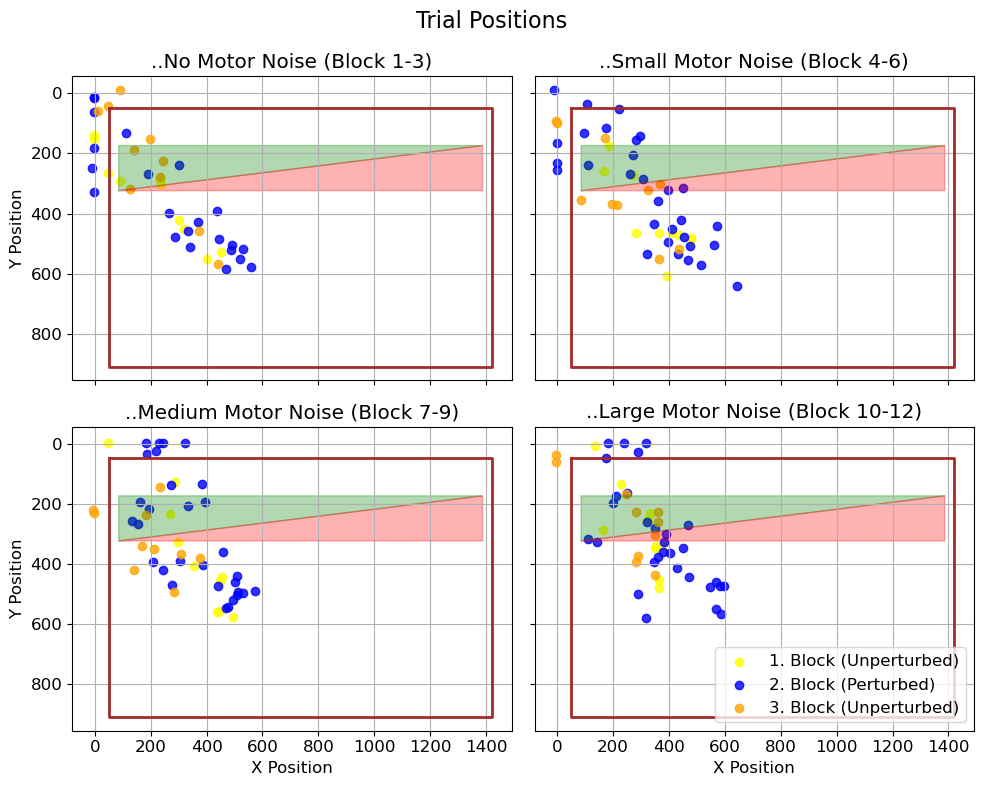

In [52]:
plt.rcParams.update({'font.size': 12})

fig, axes = plt.subplots(2, 2, figsize=(10, 8), sharex=True, sharey=True)

plt.suptitle("Trial Positions", fontsize=16)
for idx, (feedback_type, blocks) in enumerate(feedback_blocks_dict[directory].items()):
    if idx < 4:
        xy_coords = get_xy_coords(trial_positions=trial_positions, first_block=blocks[0], end_block=blocks[-1])
        axes[idx // 2, idx % 2].set_title(".." + feedback_type + " (Block {}-{})".format(blocks[0], blocks[-1]))
        plot_feedback_type(axes[idx // 2, idx % 2], xy_coords=xy_coords, feedback_type=feedback_type)

axes[0, 0].invert_yaxis()
axes[1, 1].legend(loc = "lower right")
axes[1, 0].set_xlabel('X Position')
axes[1, 1].set_xlabel('X Position')
axes[0, 0].set_ylabel('Y Position')
axes[1, 0].set_ylabel('Y Position')

plt.tight_layout()
plt.savefig(directory + 'scatter_plot.png')
plt.show()

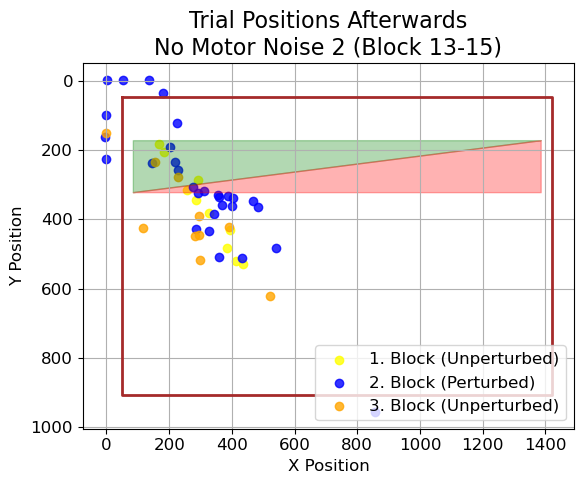

In [49]:
plt.rcParams.update({'font.size': 12})

fig, axes = plt.subplots(1, 1, figsize=(6, 5))

xy_coords = get_xy_coords(trial_positions=trial_positions, first_block=13, end_block=15)
axes.set_title("Trial Positions Afterwards\n" + feedback_type + " (Block 13-15)", fontsize=16)
plot_feedback_type(axes, xy_coords=xy_coords, feedback_type=feedback_type)

axes.invert_yaxis()
axes.legend(loc = "lower right")
axes.set_xlabel('X Position')
axes.set_ylabel('Y Position')

plt.tight_layout()
plt.savefig(directory + 'scatter_plot_3.png')
plt.show()

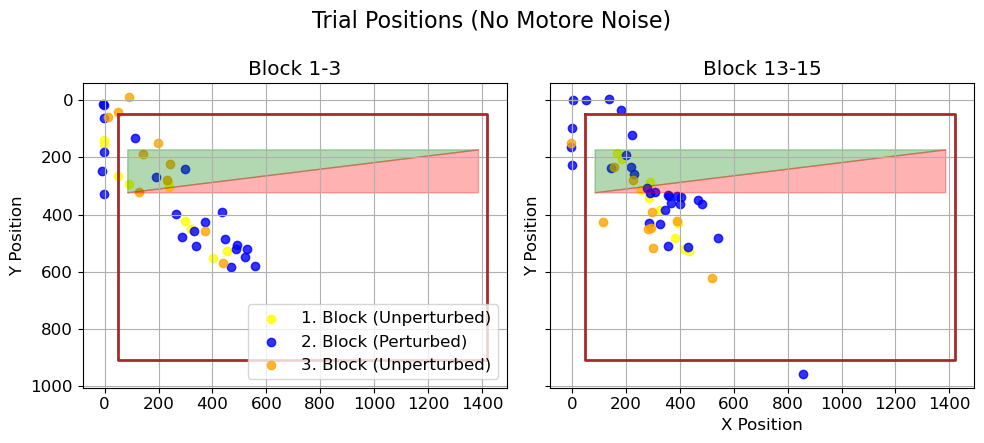

In [ ]:
plt.rcParams.update({'font.size': 12})

fig, axes = plt.subplots(1, 2, figsize=(10, 4.5), sharex=True, sharey=True)

plt.suptitle("Trial Positions (No Motore Noise)", fontsize=16)
for idx, blocks in enumerate([feedback_blocks_dict[directory]["No Motor Noise"], feedback_blocks_dict[directory]["No Motor Noise 2"]]):
    xy_coords = get_xy_coords(trial_positions=trial_positions, first_block=blocks[0], end_block=blocks[-1])
    axes[idx].set_title("Block {}-{}".format(blocks[0], blocks[-1]))
    plot_feedback_type(axes[idx], xy_coords=xy_coords, feedback_type=feedback_type)

axes[0].invert_yaxis()
axes[0].legend(loc = "lower right")
axes[1].set_xlabel('X Position')
axes[1].set_xlabel('X Position')
axes[0].set_ylabel('Y Position')
axes[1].set_ylabel('Y Position')
 
plt.tight_layout()
plt.savefig(directory + 'scatter_plot_2.png')
plt.show()